<a href="https://colab.research.google.com/github/Ahmed-Sobeih/Image-classification-CNN/blob/main/Cifar_10_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


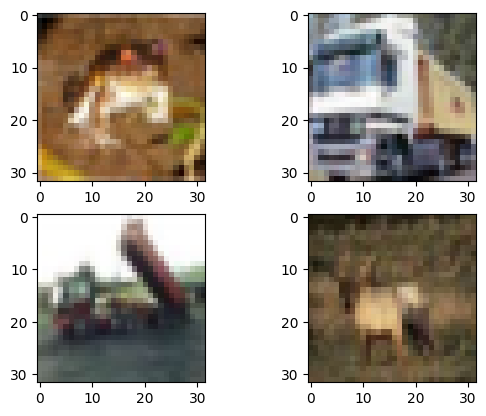

In [ ]:
fig, axs = plt.subplots(2,2)
axs[0,0].imshow(x_train[0])
axs[0,1].imshow(x_train[1])
axs[1,0].imshow(x_train[2])
axs[1,1].imshow(x_train[3])
plt.show()

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train_cat = to_categorical(y_train)

In [ ]:
y_test_cat = to_categorical(y_test)

In [ ]:
x_train = x_train/255
x_test = x_test/255

Training model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
model = Sequential()

#Convolution layer
model.add(Conv2D(filters=32, kernel_size=(2,2), input_shape=(32,32,3),activation='relu'))

model.add(Conv2D(filters=32,kernel_size=(2,2),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

#ANN
model.add(Dense(2500,activation='relu'))

model.add(Dense(2500,activation='relu'))

model.add(Dense(50,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 31, 32)        416       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        4128      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 2500)              18002500  
                                                                 
 dense_1 (Dense)             (None, 2500)              6252500   
                                                        

In [ ]:
from tensorflow.keras.utils import plot_model

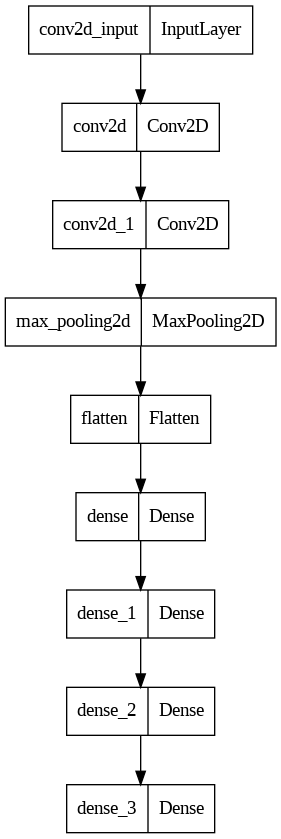

In [ ]:
plot_model(model)

In [ ]:
model.fit(x_train,y_train_cat,epochs=20,validation_data=(x_test,y_test_cat),batch_size=256)

Epoch 1/20
196/196 [==============================] - 307s 2s/step - loss: 1.1916 - accuracy: 0.5846 - val_loss: 1.3079 - val_accuracy: 0.5398
Epoch 2/20
196/196 [==============================] - 293s 1s/step - loss: 1.1621 - accuracy: 0.5932 - val_loss: 1.3179 - val_accuracy: 0.5219
Epoch 3/20
196/196 [==============================] - 303s 2s/step - loss: 1.1405 - accuracy: 0.6035 - val_loss: 1.2600 - val_accuracy: 0.5556
Epoch 4/20
196/196 [==============================] - 294s 2s/step - loss: 1.1131 - accuracy: 0.6135 - val_loss: 1.2194 - val_accuracy: 0.5694
Epoch 5/20
196/196 [==============================] - 289s 1s/step - loss: 1.0917 - accuracy: 0.6194 - val_loss: 1.2334 - val_accuracy: 0.5617
Epoch 6/20
196/196 [==============================] - 296s 2s/step - loss: 1.0713 - accuracy: 0.6281 - val_loss: 1.2050 - val_accuracy: 0.5749
Epoch 7/20
196/196 [==============================] - 296s 2s/step - loss: 1.0461 - accuracy: 0.6357 - val_loss: 1.1640 - val_accuracy: 0.5942

In [ ]:
from tensorflow.keras.saving import load_model

In [ ]:
model.save('my_model.h5')

In [ ]:
model_tomorrow = load_model('/content/my_model.h5')

OSError: ignored

# Model 2
remove the second ANN layer of 2500 neurons

In [ ]:
model = Sequential()

#Convolution layer
model.add(Conv2D(filters=32, kernel_size=(2,2), input_shape=(32,32,3),activation='relu'))

model.add(Conv2D(filters=32,kernel_size=(2,2),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

#ANN
model.add(Dense(2500,activation='relu'))


model.add(Dense(50,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train_cat,epochs=20,validation_data=(x_test,y_test_cat),batch_size=256)

Epoch 1/20
196/196 [==============================] - 283s 1s/step - loss: 2.2469 - accuracy: 0.1741 - val_loss: 2.1624 - val_accuracy: 0.2176
Epoch 2/20
196/196 [==============================] - 267s 1s/step - loss: 2.0502 - accuracy: 0.2796 - val_loss: 1.9884 - val_accuracy: 0.2858
Epoch 3/20
196/196 [==============================] - 290s 1s/step - loss: 1.9219 - accuracy: 0.3193 - val_loss: 1.8717 - val_accuracy: 0.3289
Epoch 4/20
196/196 [==============================] - 280s 1s/step - loss: 1.8372 - accuracy: 0.3527 - val_loss: 1.7991 - val_accuracy: 0.3667
Epoch 5/20
196/196 [==============================] - 299s 2s/step - loss: 1.7708 - accuracy: 0.3764 - val_loss: 1.8219 - val_accuracy: 0.3401
Epoch 6/20
196/196 [==============================] - 292s 1s/step - loss: 1.7152 - accuracy: 0.3976 - val_loss: 1.6958 - val_accuracy: 0.4011
Epoch 7/20
196/196 [==============================] - 303s 2s/step - loss: 1.6608 - accuracy: 0.4168 - val_loss: 1.6949 - val_accuracy: 0.3993